In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
excel_file = r"C:\Users\asmaj\Downloads\Data analyst Data.xlsx" 
data = pd.read_excel(excel_file)

# Display the first few rows of the dataset to understand its structure
data.head(4)


,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no


1. How many unique students are included in the dataset?

In [7]:
# Count unique students by 'Email ID'
unique_students = data['Email ID'].nunique()
print(f"Number of unique students: {unique_students}")


Number of unique students: 2157



2. What is the average GPA of the students?

In [8]:
# Calculate the average GPA
average_gpa = data['CGPA'].mean()
print(f"Average GPA: {average_gpa:.2f}")


Average GPA: 8.04


3. What is the distribution of students across different graduation years?

C:\Users\asmaj\AppData\Local\Temp\ipykernel_22640\3044115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Year of Graduation', palette='pastel')
C:\Users\asmaj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\asmaj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a futur

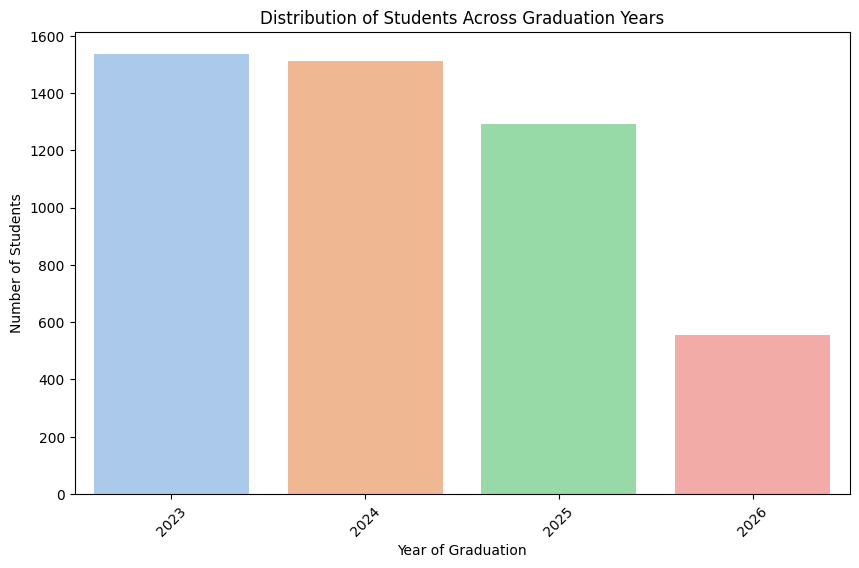

In [9]:
# Plot the distribution of students across graduation years
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Year of Graduation', palette='pastel')
plt.title('Distribution of Students Across Graduation Years')
plt.xlabel('Year of Graduation')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()


4. What is the distribution of student's experience with Python programming?

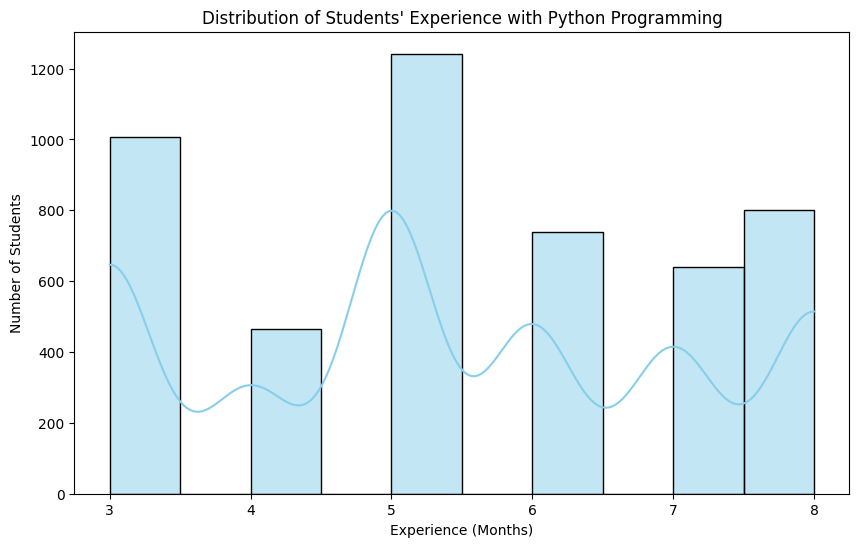

In [10]:
# Plot the distribution of students' experience with Python
plt.figure(figsize=(10, 6))
sns.histplot(data['Experience with python (Months)'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Students\' Experience with Python Programming')
plt.xlabel('Experience (Months)')
plt.ylabel('Number of Students')
plt.show()


5. What is the average family income of the students?

In [13]:
# Function to convert income strings to numeric values
def parse_income(income_str):
    if pd.isna(income_str):  # Handle NaN values
        return np.nan
    # Split the string by '-'
    ranges = income_str.split('-')
    if len(ranges) == 1:
        # If it is a single value like '7 Lakh', convert directly
        value = ranges[0].replace(' Lakh', '').replace('+', '').strip()
        return float(value)
    elif len(ranges) == 2:
        # If it is a range like '2-5 Lakh', calculate the midpoint
        low = ranges[0].replace(' Lakh', '').strip()
        high = ranges[1].replace(' Lakh', '').strip()
        return (float(low) + float(high)) / 2
    return np.nan  # Return NaN for any unexpected format

# Apply the function to the Family Income column
data['Family Income Numeric'] = data['Family Income'].apply(parse_income)

# Calculate the average family income using the numeric column
average_income = data['Family Income Numeric'].mean()
print(f"Average Family Income: {average_income:.2f} Lac")


Average Family Income: 1.29 Lac


6. How does the GPA vary among different colleges? (Show top 5 results only)

College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.585714
St Xavier's College                                                                  8.578571
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
Symbiosis Institute of Technology, Pune                                              8.303448
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
Name: CGPA, dtype: float64


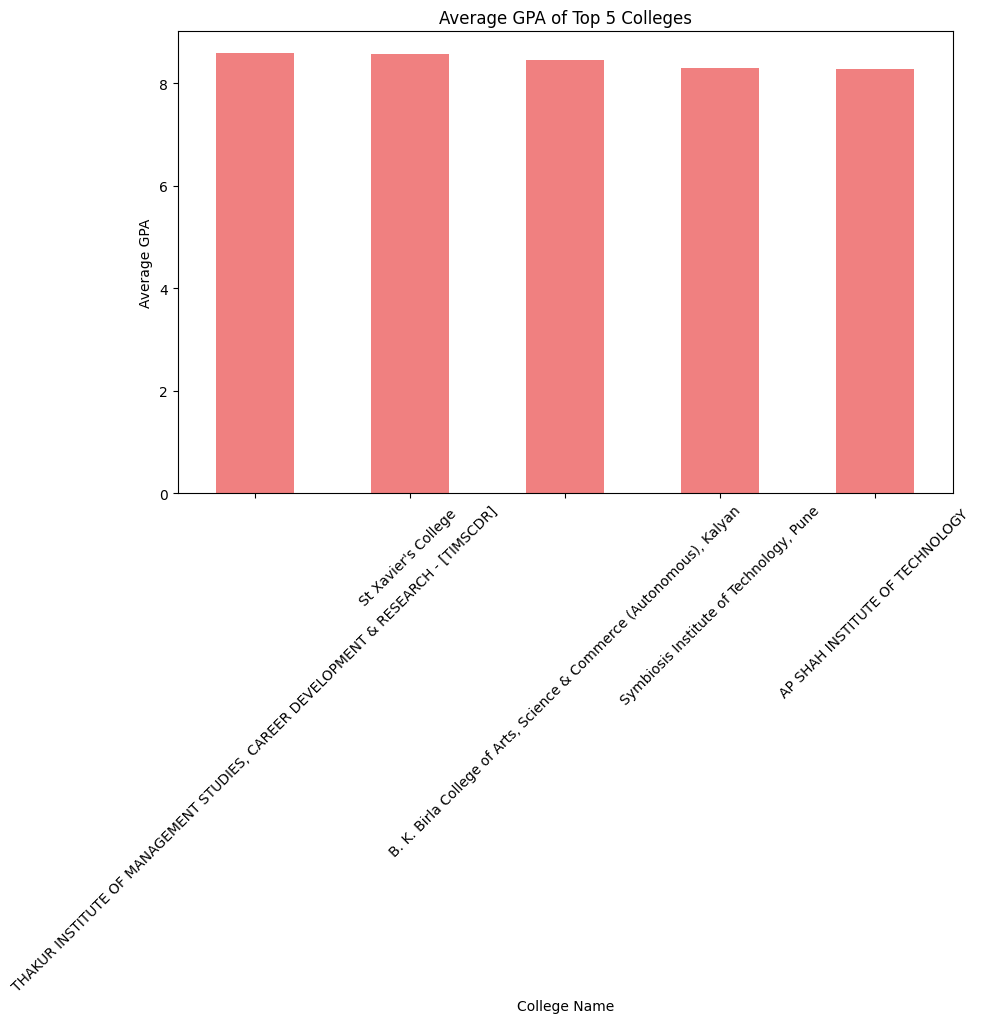

In [14]:
# Calculate average GPA by college and display top 5
avg_gpa_by_college = data.groupby('College Name')['CGPA'].mean().sort_values(ascending=False).head(5)
print(avg_gpa_by_college)

# Plot the average GPA for the top 5 colleges
plt.figure(figsize=(10, 6))
avg_gpa_by_college.plot(kind='bar', color='lightcoral')
plt.title('Average GPA of Top 5 Colleges')
plt.ylabel('Average GPA')
plt.xlabel('College Name')
plt.xticks(rotation=45)
plt.show()


7. Are there any outliers in the quantity (number of courses completed) attribute?

C:\Users\asmaj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


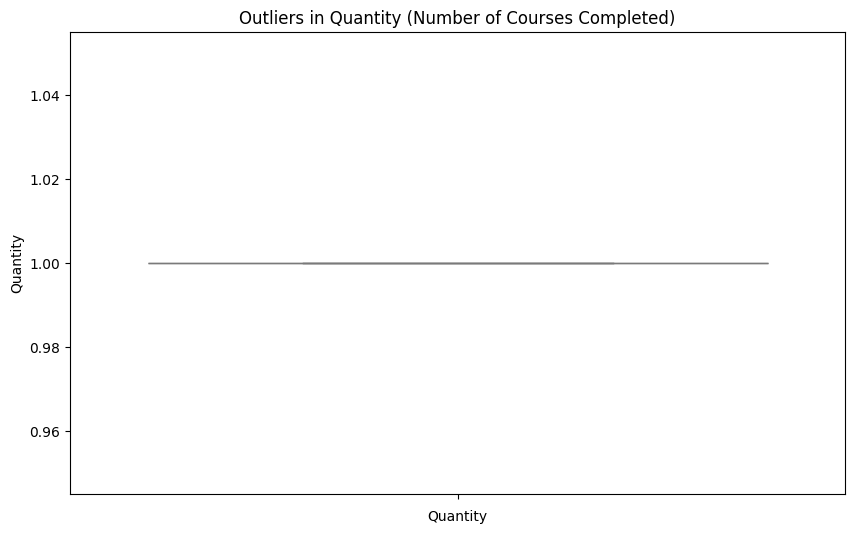

In [15]:
# Box plot to check for outliers in the 'Quantity' attribute
plt.figure(figsize=(10, 6))
sns.boxplot(data['Quantity'])
plt.title('Outliers in Quantity (Number of Courses Completed)')
plt.xlabel('Quantity')
plt.show()


8. What is the average GPA for students from each city?

Average GPA by City:
Kolhapur: 8.56
Raipur: 8.51
Sonipat: 8.46
Gurugram: 8.46
Puri: 8.45
Siwan: 8.45
Srinagar: 8.44
Delhi: 8.41
Pune: 8.40
Hasan: 8.39
Darbhanga: 8.36
Buldhana: 8.35
Jhalwar: 8.35
Nizambad: 8.34
Guwahati: 8.34
Wardha: 8.33
Panji: 8.32
Munger: 8.31
Narwar: 8.30
Budaun: 8.29
Malda: 8.29
Jaipur: 8.29
Ajmer: 8.28
Muzaffarpur: 8.28
Jammu: 8.28
Hugli: 8.28
Burani: 8.27
Jind: 8.26
Aurangabad: 8.26
Punch: 8.26
Varanasi: 8.25
Una: 8.25
Gangtok: 8.25
Sagar: 8.25
Haijipur: 8.23
Belgavi: 8.22
Tirupati: 8.21
Siuri: 8.21
Gonda: 8.20
Rajkot: 8.19
Ahemdabad: 8.19
Kollam: 8.17
Bhopal: 8.17
Mumbai: 8.16
Satara: 8.16
Guna: 8.16
Madgaon: 8.16
Nadiad: 8.15
Sikar: 8.15
Kalyan: 8.13
Faridabad: 8.12
Jamnagar: 8.12
Kheda: 8.11
Jamalpur: 8.11
Alipore: 8.10
Patiala: 8.09
Ballari: 8.09
Baramula: 8.09
Barmer: 8.08
Navi Mumbai: 8.08
Mathura: 8.07
konark: 8.07
Titagrah: 8.06
Udhampur: 8.06
Baleshwar: 8.06
Mandi: 8.06
Tezpur: 8.06
Surat: 8.06
Chandigarh: 8.06
Ujjain: 8.06
Valsad: 8.05
Bengaluru: 8.05


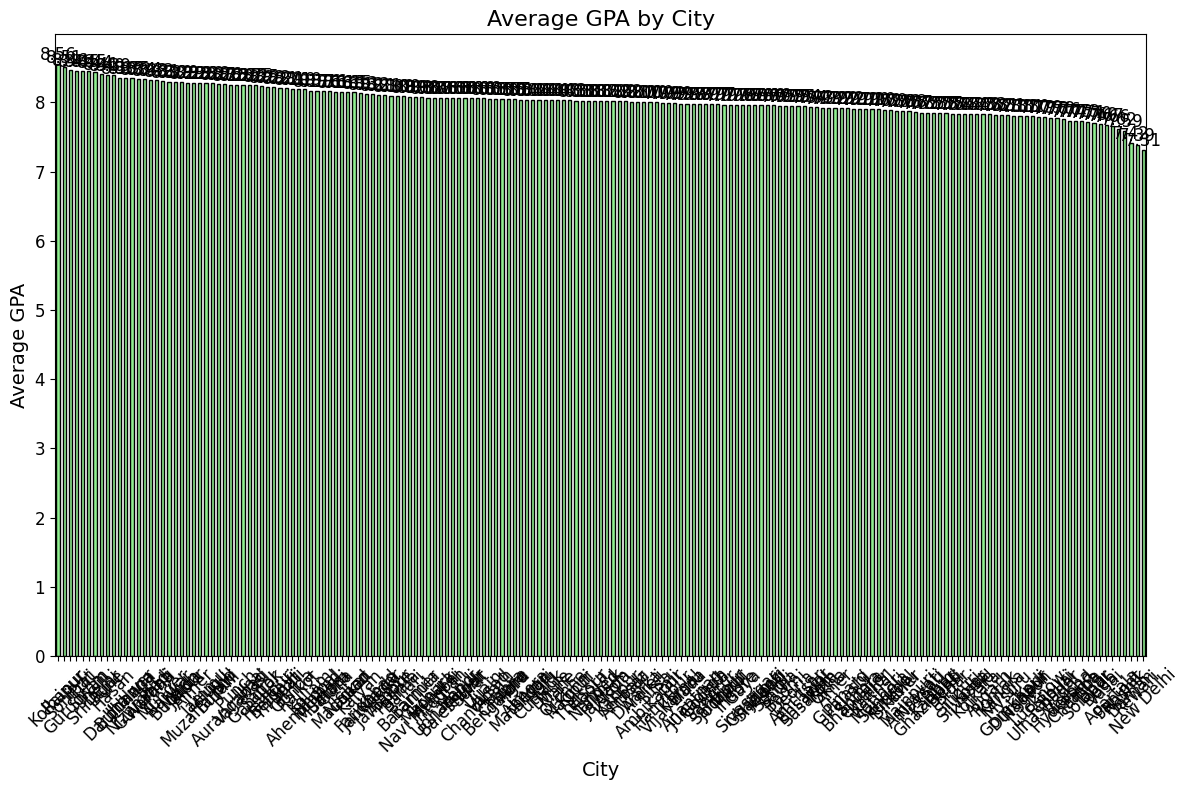

In [27]:
# Calculate average GPA by city
avg_gpa_by_city = data.groupby('City')['CGPA'].mean().sort_values(ascending=False)

# Display average GPA for each city in text format
print("Average GPA by City:")
for city, avg_gpa in avg_gpa_by_city.items():
    print(f"{city}: {avg_gpa:.2f}")

# Plot average GPA by city
plt.figure(figsize=(12, 8))  # Increase figure size
avg_gpa_by_city.plot(kind='bar', color='lightgreen', edgecolor='black')

# Add title and labels with larger font size
plt.title('Average GPA by City', fontsize=16)
plt.ylabel('Average GPA', fontsize=14)
plt.xlabel('City', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-ticks for better readability
plt.yticks(fontsize=12)  # Increase y-ticks font size

# Add data labels on top of the bars
for index, value in enumerate(avg_gpa_by_city):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

9. Can we identify any relationship between family income and GPA?

Correlation between Family Income and GPA: 0.02


C:\Users\asmaj\AppData\Local\Temp\ipykernel_22640\1136502809.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Family Income'] = data['Family Income'].replace({


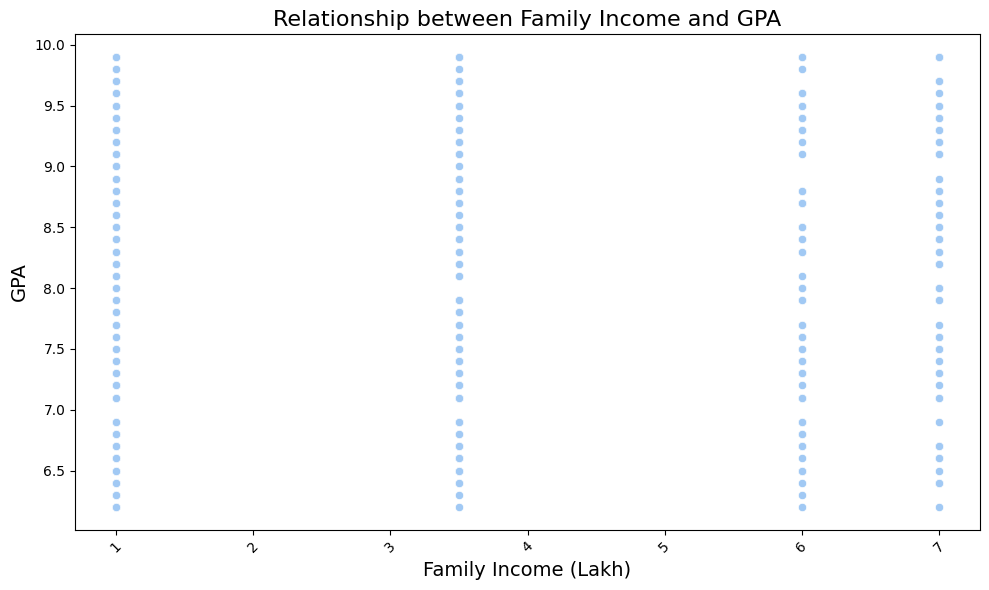

In [29]:
data['Family Income'] = data['Family Income'].replace({
    '0-2 Lakh': 1,
    '2-5 Lakh': 3.5,
    '5-7 Lakh': 6,
    '7 Lakh+': 7,
   
})

# Calculate correlation coefficient
correlation = data['Family Income'].corr(data['CGPA'])
print(f"Correlation between Family Income and GPA: {correlation:.2f}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Family Income', y='CGPA', data=data)
plt.title('Relationship between Family Income and GPA', fontsize=16)
plt.xlabel('Family Income (Lakh)', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

10. How many students from various cities? (Solve using data visualization tool).

Number of Students from Each City:
Chandigarh: 57
Siuri: 56
Talmuk: 56
Gonda: 56
Sikar: 52
Kota: 52
Bikaner: 52
Jaipur: 52
Jhalwar: 52
Jodhpur: 52
Ahemdabad: 52
Jalor: 52
Pali: 52
Amreli: 52
Dwarka: 52
Patiala: 51
Barmer: 51
Amer: 51
Ajmer: 51
Sangrur: 51
Jalgaon: 51
Amritsar: 51
Buldhana: 51
Aurangabad: 51
Mahe: 51
Bhandara: 51
Bhsawal: 51
Bid: 51
Dhule: 51
Kalyan: 51
Thane: 51
Navi Mumbai: 51
Mumbai: 51
Nagpur: 51
Nanded: 51
Godhra: 50
Navsari: 44
Valsad: 44
Surat: 44
Morbi: 44
Kheda: 44
Junagadh: 44
Rajkot: 44
Okha: 44
Nadiad: 44
Jamnagar: 44
Ambala: 43
Faridabad: 43
Hamirpur: 42
Ujjain: 42
Sagar: 42
Orchha: 42
Satna: 42
Akola: 42
Vidisha: 42
Mainpuri: 28
Mathura: 28
Deoria: 28
Gorakhpur: 28
Ghaziabad: 28
Durgapur: 28
Kanpur: 28
Malda: 28
Kolkata: 28
Jhansi: 28
Ghazipur: 28
Budaun: 28
Aligarh: 28
Agra: 28
Agartala: 28
Titagrah: 28
Silguri: 28
Siliguri: 28
Santipur: 28
Palashi: 28
Hugli: 28
Nizambad: 28
Alipore: 28
Almora: 28
Varanasi: 28
Haora: 28
Lucknow: 28
Gurugram: 27
Hisar: 27


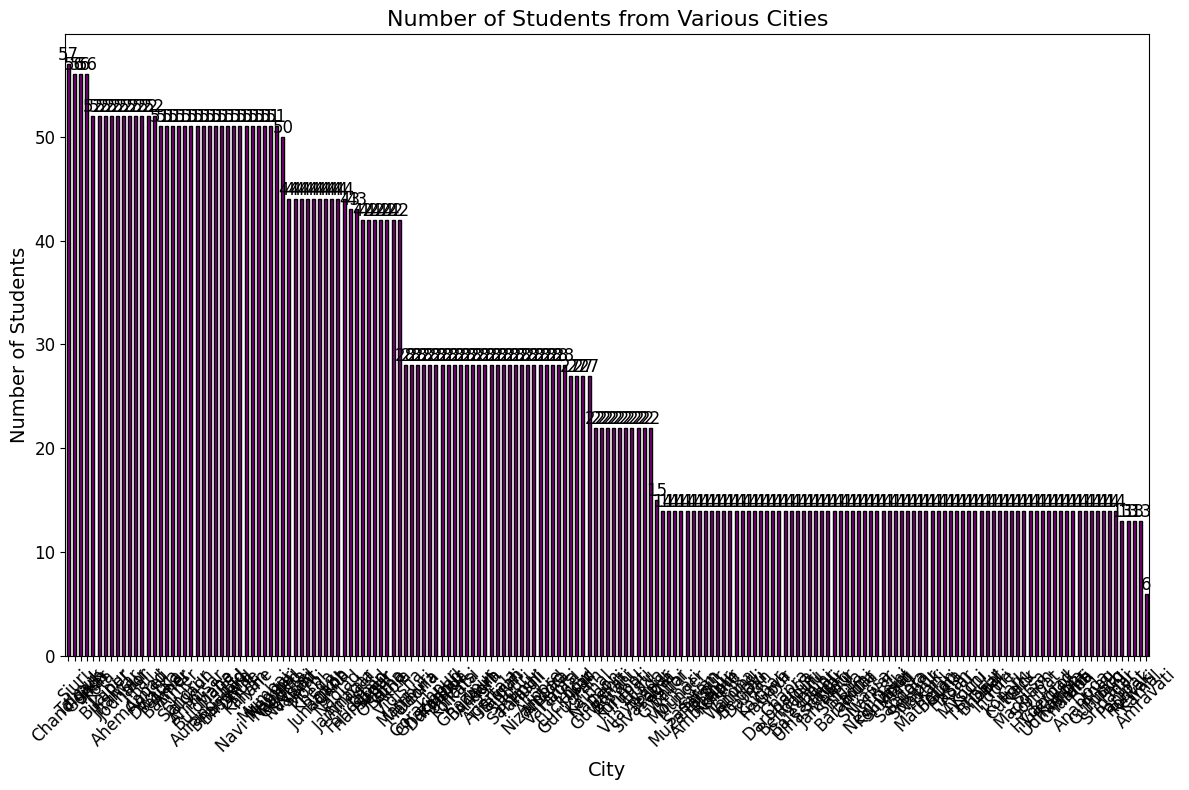

In [33]:
# Count the number of students from each city
students_per_city = data['City'].value_counts()

# Display the number of students for each city in text format
print("Number of Students from Each City:")
for city, count in students_per_city.items():
    print(f"{city}: {count}")

# Plot the number of students from various cities
plt.figure(figsize=(12, 8))  # Increase figure size
students_per_city.plot(kind='bar', color='purple', edgecolor='black')

# Add title and labels with larger font size
plt.title('Number of Students from Various Cities', fontsize=16)
plt.ylabel('Number of Students', fontsize=14)
plt.xlabel('City', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-ticks for better readability
plt.yticks(fontsize=12)  # Increase y-ticks font size

# Add data labels on top of the bars
for index, value in enumerate(students_per_city):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


11. How does the expected salary vary based on factors like 'GPA', 'Family income', 'Experience with python (Months)'?

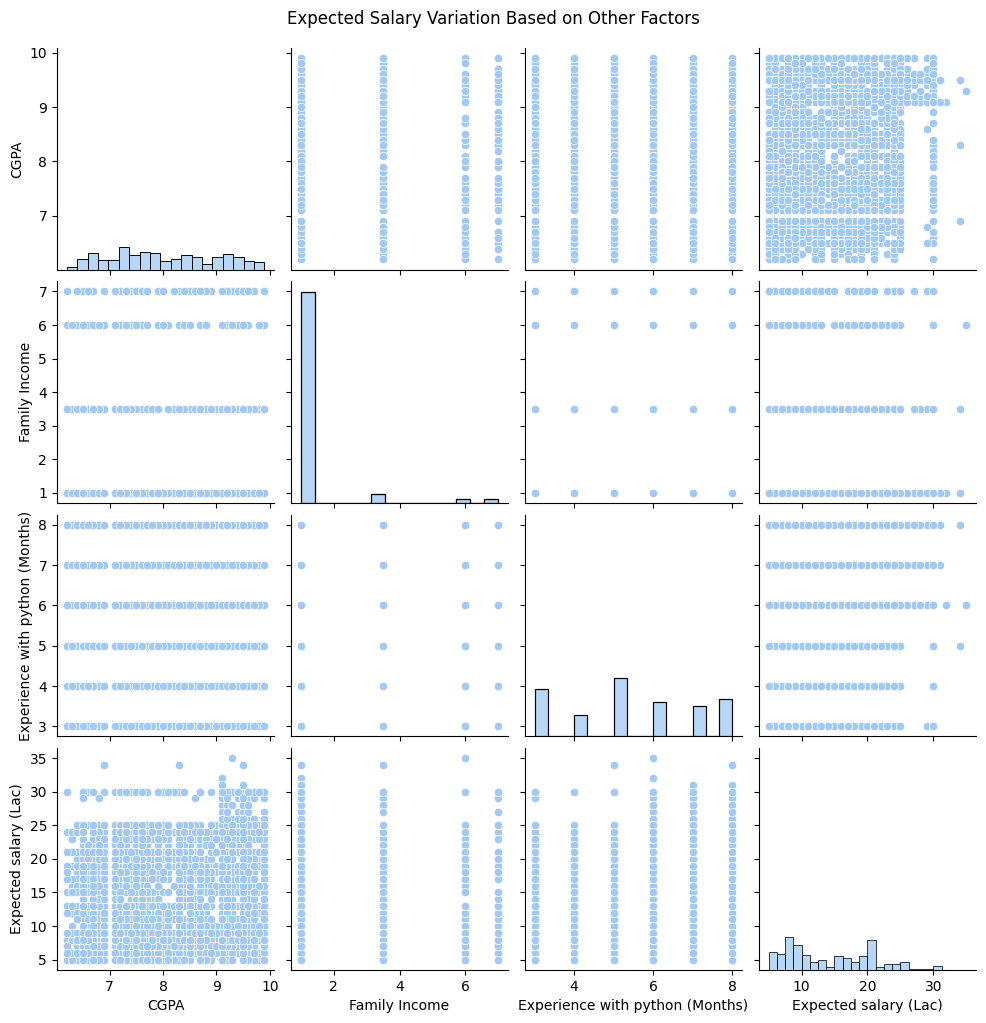

In [34]:
# Create a pair plot to visualize the relationships
sns.pairplot(data[['CGPA', 'Family Income', 'Experience with python (Months)', 'Expected salary (Lac)']])
plt.suptitle('Expected Salary Variation Based on Other Factors', y=1.02)
plt.show()


12. Which event tends to attract more students from specific fields of study?

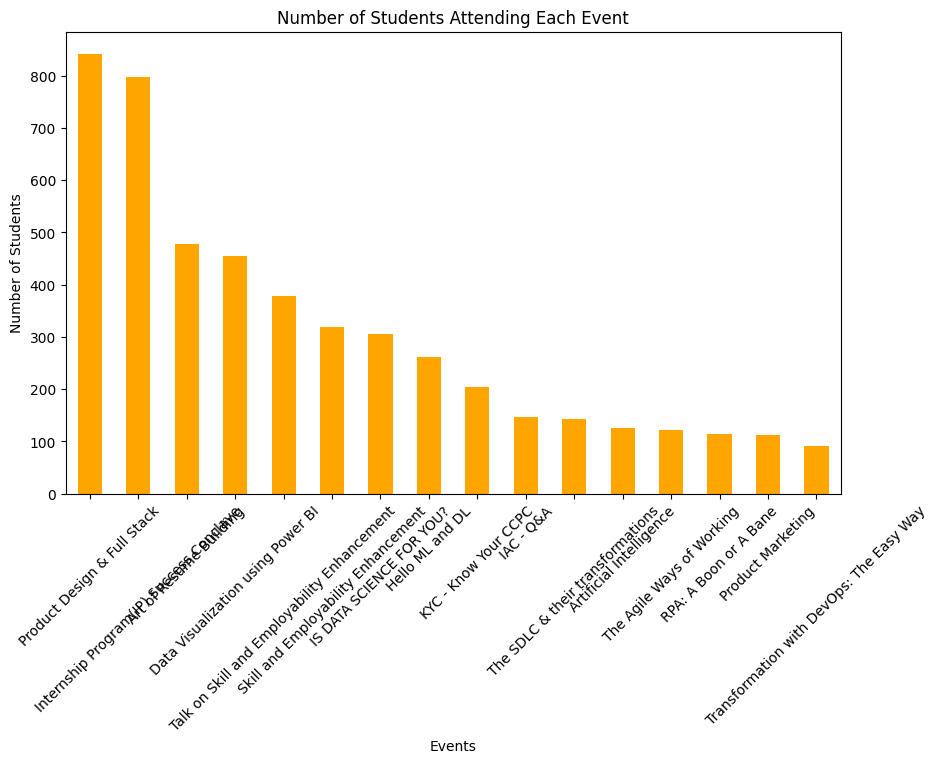

In [35]:
# Count the number of students attending each event
students_per_event = data['Events'].value_counts()

# Plot the number of students attending each event
plt.figure(figsize=(10, 6))
students_per_event.plot(kind='bar', color='orange')
plt.title('Number of Students Attending Each Event')
plt.ylabel('Number of Students')
plt.xlabel('Events')
plt.xticks(rotation=45)
plt.show()


13. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

In [36]:
# Calculate average GPA and expected salary for students in leadership positions
leadership_students = data[data['Leadership- skills'] == 'Yes']
avg_gpa_leadership = leadership_students['CGPA'].mean()
avg_salary_leadership = leadership_students['Expected salary (Lac)'].mean()

print(f"Average GPA of students in leadership: {avg_gpa_leadership:.2f}")
print(f"Average Expected Salary of students in leadership: {avg_salary_leadership:.2f} Lac")


Average GPA of students in leadership: nan
Average Expected Salary of students in leadership: nan Lac


14. How many students are graduating by the end of 2024?

In [37]:
# Count students graduating in or after 2024
graduating_students = data[data['Year of Graduation'] >= 2024]
print(f"Number of students graduating by the end of 2024: {len(graduating_students)}")


Number of students graduating by the end of 2024: 3358


15. Which promotion channel brings in more student participations for the event?

Number of Students by Promotion Channel:
Whatsapp: 1067
Email: 438
SPOC/ College Professor: 326
Others: 153
Cloud Counselage Website: 129
Whatsapp | SPOC/ College Professor: 67
LinkedIn: 55
Facebook: 48
Youtube: 37
Friend/ Classmate: 30
Instagram: 29
Whatsapp | Email: 26
Email | Cloud Counselage Website: 25
Telegram: 15
Email | SPOC/ College Professor: 15
Youtube | Whatsapp: 14
Whatsapp | Others: 12
Whatsapp | Friend/ Classmate: 12
Youtube | Whatsapp | Email: 12
Whatsapp | Cloud Counselage Website: 10
Friend/ Classmate | SPOC/ College Professor: 9
Youtube | Email: 7
Cloud Counselage Website | Others: 6
Cloud Counselage Website | SPOC/ College Professor: 6
Youtube | Facebook | Instagram | Whatsapp | Email: 5
LinkedIn | Email: 5
Youtube | Facebook | Instagram | LinkedIn | Whatsapp | Email | Cloud Counselage Website | Others: 4
LinkedIn | Whatsapp: 4
Whatsapp | Email | Cloud Counselage Website: 4
Instagram | LinkedIn: 3
Youtube | Facebook | Whatsapp | Email: 3
Youtube | Facebook: 3
Email 

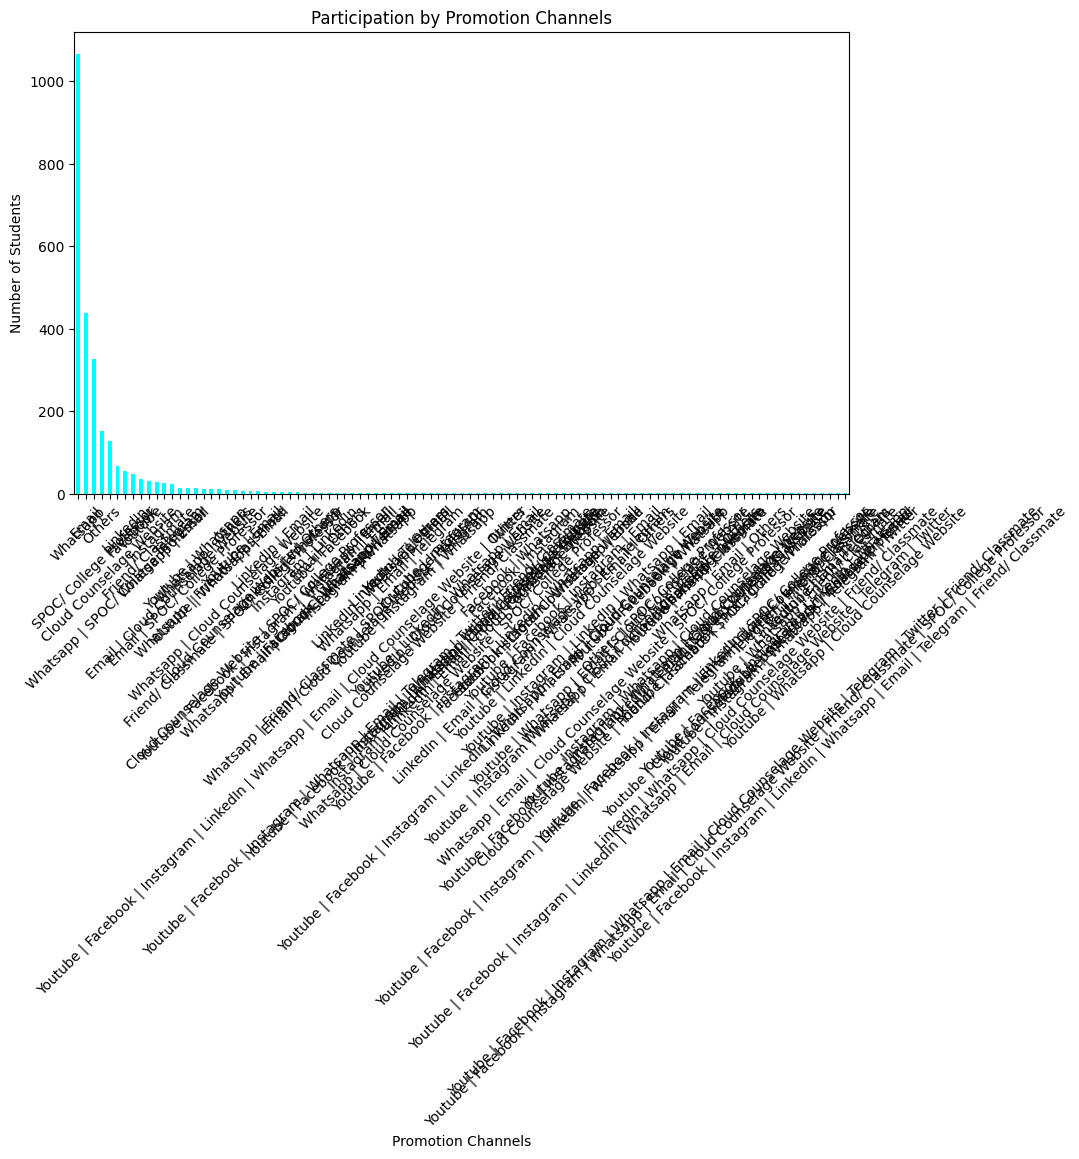

In [40]:
# Count of students based on how they came to know about the event
promotion_channels = data['How did you come to know about this event?'].value_counts()

# Display the number of students for each promotion channel in text format
print("Number of Students by Promotion Channel:")
for channel, count in promotion_channels.items():
    print(f"{channel}: {count}")

# Plot the distribution of promotion channels
plt.figure(figsize=(10, 6))
promotion_channels.plot(kind='bar', color='cyan')
plt.title('Participation by Promotion Channels')
plt.ylabel('Number of Students')
plt.xlabel('Promotion Channels')
plt.xticks(rotation=45)
plt.show()


16. Find the total number of students who attended the events related to Data Science.

In [41]:
# Filter data for Data Science related events
data_science_events = data[data['Events'].str.contains('Data Science', case=False)]
total_data_science_attendees = len(data_science_events)

print(f"Total number of students who attended Data Science related events: {total_data_science_attendees}")


Total number of students who attended Data Science related events: 306


17. Those who have high CGPA & more experience in language those who had high expectations for salary? (Avg)


In [42]:
# Filter data for high CGPA and experience
high_cgpa_experience = data[(data['CGPA'] > 8) & (data['Experience with python (Months)'] > 6)]
average_salary_high_cgpa_experience = high_cgpa_experience['Expected salary (Lac)'].mean()

print(f"Average expected salary for students with high CGPA and experience: {average_salary_high_cgpa_experience:.2f} Lac")


Average expected salary for students with high CGPA and experience: 17.01 Lac


18. How many students know about the event from their colleges? Which of these Top 5 colleges?

Top 5 colleges from which students know about the event:
College Name
vidyalankar institute of technology, mumbai              23
kle society's college of bca, rls institute, belagavi    23
mit academy of engineering ,alandi                       23
ld college of engineering, ahmedabad, gujarat            20
priyadarshini college of engineering, nagpur             20
Name: count, dtype: int64


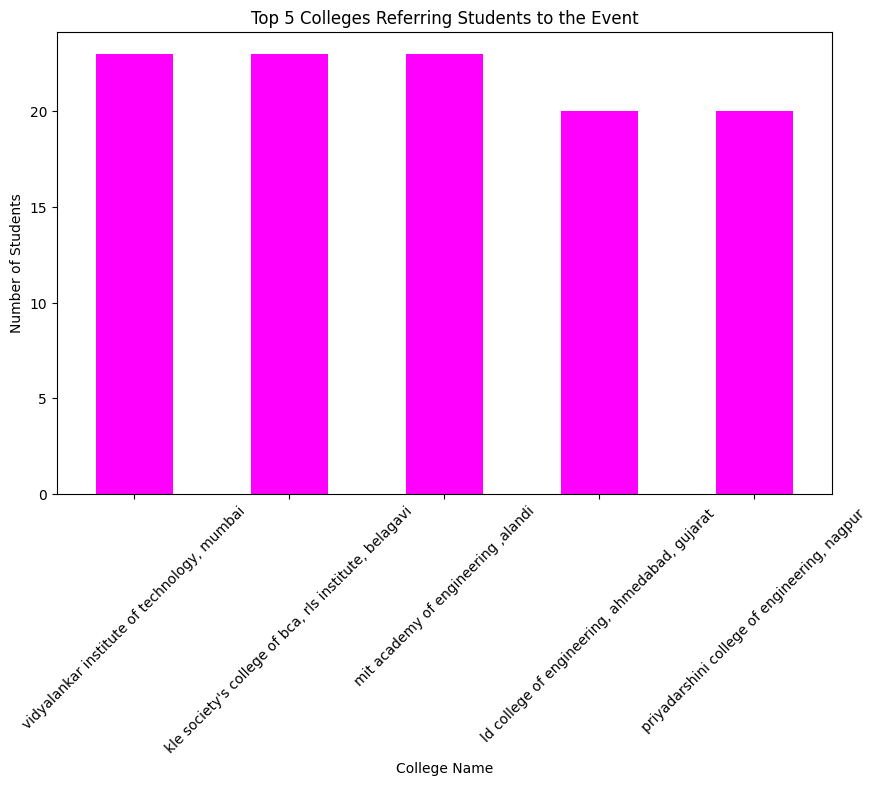

In [44]:
# First, drop rows where the relevant column is NaN
data['How did you come to know about this event?'] = data['How did you come to know about this event?'].fillna('')

# Count of students who heard about the event from their colleges
college_referred = data[data['How did you come to know about this event?'].str.contains('college', case=False, na=False)]

# Count students per college
top_colleges = college_referred['College Name'].value_counts().head(5)

print("Top 5 colleges from which students know about the event:")
print(top_colleges)

# Plot the top colleges
plt.figure(figsize=(10, 6))
top_colleges.plot(kind='bar', color='magenta')
plt.title('Top 5 Colleges Referring Students to the Event')
plt.ylabel('Number of Students')
plt.xlabel('College Name')
plt.xticks(rotation=45)
plt.show()